<a href="https://colab.research.google.com/github/ollihansen90/zeugs/blob/main/Rosenbrock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import numpy as np
import matplotlib.pyplot as plt

N = 100
base = np.linspace(-2,2, num=N)
mapbase = np.reshape(np.stack(np.meshgrid(base, base)).T, (N**2, 2))

def getimg(data):
    """
    Verwandle Koordinatenliste in Bild (Hintergrund schwarz)
    Eingabe: 
        data: Liste mit Koordinaten und Farbwerten
            [10, 5, 0.1] wäre beispielsweise die "Farbe" 0.1 in Zeile 10, Spalte 5
    Ausgabe:
        img: Matrix mit befüllten Farbwerten
    """
    img = np.zeros(np.max(data, axis=0).astype(np.intc)[:-1]+1)
    img[data[:,0].astype(np.intc), data[:,1].astype(np.intc)] = data[:,2]
    img /= np.max(img)
    return img

def f(x,y):
    a = 1
    b = 100
    output = (a-x)**2+b*(y-x**2)**2
    return output

def del_f(x,y):
    a = 1
    b = 100
    output_x = -2*(a-x)+b*2*(y-x**2)*(-2*x)
    output_y = 2*b*(y-x**2)
    return np.array([output_x, output_y])


(10000, 3)


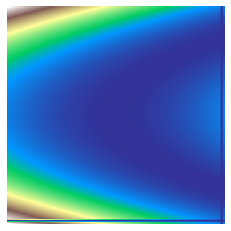

In [72]:
map = np.column_stack((N/4*(mapbase+2), f(mapbase[:,0], mapbase[:,1])))

def drawdatboi(data, schritte=None):
    img = getimg(data)
    plt.figure()
    plt.imshow(img, cmap="terrain")
    if schritte is not None:
        plt.plot(schritte[0,0], schritte[0,1], "rx")
        plt.plot(schritte[:,0], schritte[:,1], "r")
        plt.plot(schritte[-1,0], schritte[-1,1], "rx")
        plt.plot(75,75,"gx")
    plt.axis("off")
    plt.show()
print(map.shape)
drawdatboi(map)

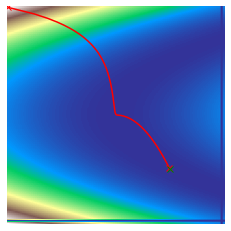

In [94]:
start = np.array([-2,-2])
n_schritte = 100000
lr = 1e-4
schritte = np.zeros([n_schritte,2])
schritte[0] = start

for i in range(1, n_schritte):
    update = del_f(schritte[i-1, 0], schritte[i-1, 1])
    schritte[i] = schritte[i-1]-lr*update
#print(schritte)
drawdatboi(map, N/4*(schritte+2))